# Análisis exploratorio: Corona virus (Covid-19)

In [12]:
# Introducción a la Minería de datos
# Hito 1
# Por Raúl Cid, José Espina, Alejandro Veragua y Michelle <poner apellido acaaa>
# Dataset original: https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pylab as plt # para dibujar
import os # para cargar los csv
import ntpath # para extraer el nombre del archivo de cada path

# Funciones definidas por nosotros
def calcularEstadisticos(dataFrame):
    total = len(dataFrame)
    print('------------ NULOS ------------')
    nulos = dataFrame.isna().sum()
    print(nulos)
    print('------------ MINIMOS ------------')
    minimos = dataFrame.min()
    print(minimos)
    print('------------ MAXIMOS ------------')
    maximos = dataFrame.max()
    print(maximos)
    print('------------ PROMEDIOS ------------')
    promedios = dataFrame[['Confirmed', 'Deaths', 'Recovered']].mean()
    print(promedios)
    print('------------ STD ------------')
    std = dataFrame[['Confirmed', 'Deaths', 'Recovered']].std()
    print(std)

# Se prepara carga de los archivos del dataset
paths = []
for dirname, _, filenames in os.walk('./novel-corona-virus-2019-dataset'):
    for filename in filenames:
        path = os.path.join(dirname, filename)
        paths.append(path);

## Observaciones
* El archivo */kaggle/input/novel-corona-virus-2019-dataset/COVID19_open_line_list.csv* tiene las columnas vacias al final 
* El archivo */kaggle/input/novel-corona-virus-2019-dataset/COVID19_line_list_data.csv* tiene la cuarta columa vacía, y las del final

In [13]:
print(paths)
dataFrames = {}
for path in paths:
    print('Se ha cargado {path}'.format(path = path))
    dataFrames[ntpath.basename(path)] = pd.read_csv(path)

['./novel-corona-virus-2019-dataset\\COVID19_line_list_data.csv', './novel-corona-virus-2019-dataset\\COVID19_open_line_list.csv', './novel-corona-virus-2019-dataset\\covid_19_data.csv', './novel-corona-virus-2019-dataset\\time_series_covid_19_confirmed.csv', './novel-corona-virus-2019-dataset\\time_series_covid_19_confirmed_US.csv', './novel-corona-virus-2019-dataset\\time_series_covid_19_deaths.csv', './novel-corona-virus-2019-dataset\\time_series_covid_19_deaths_US.csv', './novel-corona-virus-2019-dataset\\time_series_covid_19_recovered.csv']
Se ha cargado ./novel-corona-virus-2019-dataset\COVID19_line_list_data.csv
Se ha cargado ./novel-corona-virus-2019-dataset\COVID19_open_line_list.csv
Se ha cargado ./novel-corona-virus-2019-dataset\covid_19_data.csv
Se ha cargado ./novel-corona-virus-2019-dataset\time_series_covid_19_confirmed.csv
Se ha cargado ./novel-corona-virus-2019-dataset\time_series_covid_19_confirmed_US.csv
Se ha cargado ./novel-corona-virus-2019-dataset\time_series_cov

# I Análisis Exploratorio

Se propone las siguientes acciones como primer acercamiento a los datos
1. Para cada archivo CSV del *dataset*, describir cada una de las columnas
2. Contar datos NaNs (Not a Number) por cada columna
3. Calcular estadísticas básicas, tales como mínimos, máximos, medias, desviación estándar y otros
4. Definir países de interés la cantidad de registros de cada uno de ellos

## Archivo *covid_19_data.csv*

Este archivo describe la cantidad de afectados por el virus para casos confirmados, fallecimientos y recuperados, de forma acumulativa. Posee las siguientes columnas:

* ObservationDate: Corresponde a la fecha en que se tomó el dato
* Province/State: Corresponde al nombre de la provincia o región del país donde se tomó el dato
* Country/Region: Corresponde al nombre del país donde se tomó el dato
* Last Update: Corresponde a la fecha en que actualizó el dato por última vez
* Confirmed: Corresponde a la cantidad acumulada de personas contagiadas del virus confirmadas hasta la fecha
* Deaths: Corresponde a la cantidad acumulada de personas fallecidas por el virus confirmadas hasta la fecha
* Recovered: Corresponde a la cantidad acumulada de personas recuperadas del virus hasta la fecha

### Estadísticas básicas

| Nombre columna  | Filas   | Nulos | Tipo de dato | Mínimo   | Máximo   |
|-----------------|---------|-------|--------------|----------|----------|
| ObservationDate |  9423   |  0    |    Date      |01/22/2020|03/27/2020|
| Province/State  |  9423   | 4260  |    Text      |NO APLICA |NO APLICA |
| Country/Region  |  9423   |   0   |    Text      |NO APLICA |NO APLICA |
| Last Update     |  9423   |   0   |    Date      |1/22/2020 | 3/8/20   |
| Confirmed       |  9423   |   0   |    Number    |    0     |   86498  |
| Deaths          |  9423   |   0   |    Number    |    0     |   9134   |
| Recovered       |  9423   |   0   |    Number    |    0     |  61732   |

# ***POR HACER*** Hacer el mismo análisis para el resto de los archivos

In [14]:
# Cálculo estadísticas básicas
covid19Data = dataFrames['covid_19_data.csv']
calcularEstadisticos(covid19Data)

------------ NULOS ------------
SNo                   0
ObservationDate       0
Province/State     5486
Country/Region        0
Last Update           0
Confirmed             0
Deaths                0
Recovered             0
dtype: int64
------------ MINIMOS ------------
SNo                              1
ObservationDate         01/22/2020
Country/Region          Azerbaijan
Last Update        1/22/2020 17:00
Confirmed                        0
Deaths                           0
Recovered                        0
dtype: object
------------ MAXIMOS ------------
SNo                                         11614
ObservationDate                        04/03/2020
Country/Region     occupied Palestinian territory
Last Update                           3/8/20 5:31
Confirmed                                  119827
Deaths                                      14681
Recovered                                   63612
dtype: object
------------ PROMEDIOS ------------
Confirmed    1175.025831
Deaths     

In [15]:
# Cantidad de confirmados por país, ordenados de mayor a menor
covid19GroupByCountry = covid19Data.groupby(['Country/Region'])
covid19GroupByCountry["Confirmed"].agg(sum).reset_index().sort_values(['Confirmed'],ascending=False).set_index(['Country/Region','Confirmed'])
# **POR HACER** Esto muestra los datos acumulados. Debemos hacer un nuevo dataframe con los confirmados/fallecidos/recuperados por día

,
Country/Region,Confirmed
Mainland China,4421011.0
US,1819863.0
Italy,1556732.0
Spain,1077914.0
Germany,842582.0
...,...
Channel Islands,1.0
Cape Verde,1.0
North Ireland,1.0


In [16]:
covid19Data

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
11609,11610,04/03/2020,Wyoming,US,2020-04-03 22:52:45,162.0,0.0,0.0
11610,11611,04/03/2020,Xinjiang,Mainland China,2020-04-03 22:52:45,76.0,3.0,73.0
11611,11612,04/03/2020,Yukon,Canada,2020-04-03 22:52:45,6.0,0.0,0.0
11612,11613,04/03/2020,Yunnan,Mainland China,2020-04-03 22:52:45,184.0,2.0,172.0


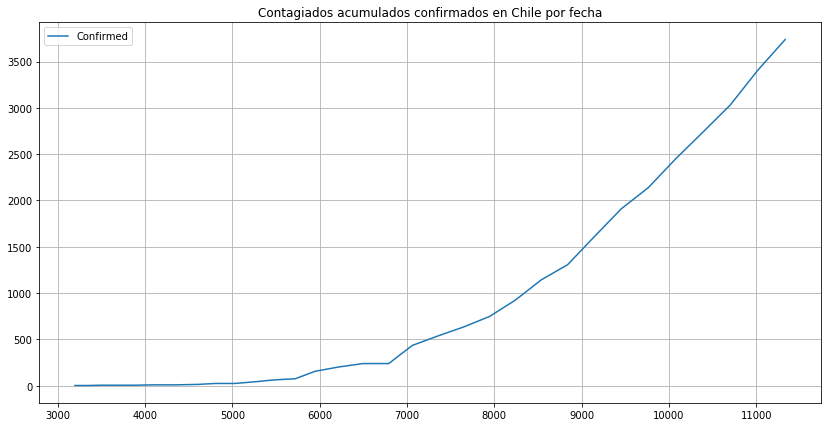

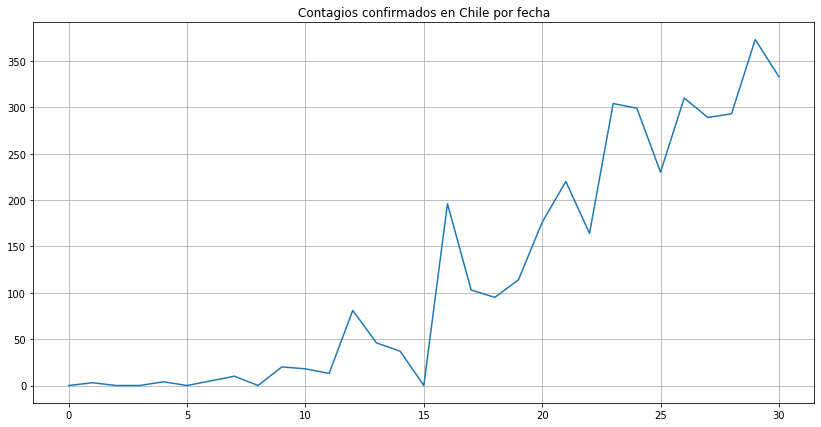

In [17]:
chileCovid = covid19Data[covid19Data['Country/Region'] == 'Chile']
chileCovid[['Confirmed', 'ObservationDate']].plot(figsize=(14, 7), grid=True, title='Contagiados acumulados confirmados en Chile por fecha')
distribucion = chileCovid['Confirmed'].values[1:] - chileCovid['Confirmed'].values[:-1]

plt.figure(figsize=(14, 7))
plt.title("Contagios confirmados en Chile por fecha")
plt.grid(True)
plt.plot(distribucion)
plt.show()

# Archivo *time_series_covid_19_confirmed.csv*
Este archivo describe los casos confirmados en el tiempo, por país

In [18]:
casosConfirmados = dataFrames['time_series_covid_19_confirmed.csv']
casosConfirmados

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20
0,NaN,Afghanistan,33.000000,65.000000,0,0,0,0,0,0,...,84,94,110,110,120,170,174,237,273,281
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,146,174,186,197,212,223,243,259,277,304
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,302,367,409,454,511,584,716,847,986,1171
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,188,224,267,308,334,370,376,390,428,439
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,3,4,4,5,7,7,7,8,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253,NaN,Botswana,-22.328500,24.684900,0,0,0,0,0,0,...,0,0,0,0,0,3,4,4,4,4
254,NaN,Burundi,-3.373100,29.918900,0,0,0,0,0,0,...,0,0,0,0,0,0,2,2,3,3
255,NaN,Sierra Leone,8.460555,-11.779889,0,0,0,0,0,0,...,0,0,0,0,0,0,1,2,2,2
256,"Bonaire, Sint Eustatius and Saba",Netherlands,12.178400,-68.238500,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,2


# Archivo *time_series_covid_19_recovered.csv*
Este archivo describe los casos recuperados en el tiempo

In [19]:
casosRecuperados = dataFrames['time_series_covid_19_recovered.csv']

# Archivo *time_series_covid_19_deaths.csv*
Este archivo describe los casos de muerte en el tiempo

In [20]:
dataFrames['time_series_covid_19_deaths.csv']

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20
0,NaN,Afghanistan,33.000000,65.000000,0,0,0,0,0,0,...,2,4,4,4,4,4,4,4,6,6
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,5,6,8,10,10,11,15,15,16,17
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,21,25,26,29,31,35,44,58,86,105
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,1,3,3,3,6,8,12,14,15,16
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,0,0,0,0,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253,NaN,Botswana,-22.328500,24.684900,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,1
254,NaN,Burundi,-3.373100,29.918900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
255,NaN,Sierra Leone,8.460555,-11.779889,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
256,"Bonaire, Sint Eustatius and Saba",Netherlands,12.178400,-68.238500,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Archivo *COVID19_open_line_list*
Casos georeferenciados, datos personales y síntomas

In [21]:
dataFrames['COVID19_open_line_list.csv']

,ID,age,sex,city,province,country,wuhan(0)_not_wuhan(1),latitude,longitude,geo_resolution,...,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44
0,1.0,30,male,"Chaohu City, Hefei City",Anhui,China,1.0,31.646960,117.716600,admin3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,47,male,"Baohe District, Hefei City",Anhui,China,1.0,31.778630,117.331900,admin3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,49,male,"High-Tech Zone, Hefei City",Anhui,China,1.0,31.828313,117.224844,point,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,47,female,"High-Tech Zone, Hefei City",Anhui,China,1.0,31.828313,117.224844,point,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,50,female,"Feidong County, Hefei City",Anhui,China,1.0,32.001230,117.568100,admin3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14121,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14123,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14124,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Archivo *COVID19_open_line_list*

In [22]:
dataFrames['COVID19_line_list_data.csv']

,id,case_in_country,reporting date,Unnamed: 3,summary,location,country,gender,age,symptom_onset,...,recovered,symptom,source,link,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
0,1,NaN,1/20/2020,NaN,First confirmed imported COVID-19 pneumonia pa...,"Shenzhen, Guangdong",China,male,66.0,01/03/20,...,0,NaN,Shenzhen Municipal Health Commission,http://wjw.sz.gov.cn/wzx/202001/t20200120_1898...,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NaN,1/20/2020,NaN,First confirmed imported COVID-19 pneumonia pa...,Shanghai,China,female,56.0,1/15/2020,...,0,NaN,Official Weibo of Shanghai Municipal Health Co...,https://www.weibo.com/2372649470/IqogQhgfa?fro...,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,1/21/2020,NaN,First confirmed imported cases in Zhejiang: pa...,Zhejiang,China,male,46.0,01/04/20,...,0,NaN,Health Commission of Zhejiang Province,http://www.zjwjw.gov.cn/art/2020/1/21/art_1202...,NaN,NaN,NaN,NaN,NaN,NaN
3,4,NaN,1/21/2020,NaN,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,female,60.0,NaN,...,0,NaN,人民日报官方微博,https://m.weibo.cn/status/4463235401268457?,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,1/21/2020,NaN,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,male,58.0,NaN,...,0,NaN,人民日报官方微博,https://m.weibo.cn/status/4463235401268457?,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,1081,2.0,2/25/2020,NaN,"new COVID-19 patient confirmed in Austria: 24,...",Innsbruck,Austria,NaN,24.0,NaN,...,0,NaN,Jakarta Post,https://www.thejakartapost.com/news/2020/02/25...,NaN,NaN,NaN,NaN,NaN,NaN
1081,1082,1.0,2/24/2020,NaN,new COVID-19 patient confirmed in Afghanistan:...,Afghanistan,Afghanistan,NaN,35.0,NaN,...,0,NaN,Fox News,https://www.foxnews.com/health/afghanistan-fir...,NaN,NaN,NaN,NaN,NaN,NaN
1082,1083,1.0,2/26/2020,NaN,new COVID-19 patient confirmed in Algeria: mal...,Algeria,Algeria,male,NaN,NaN,...,0,NaN,South China Morning Post,https://www.scmp.com/news/china/society/articl...,NaN,NaN,NaN,NaN,NaN,NaN
1083,1084,1.0,2/25/2020,NaN,new COVID-19 patient confirmed in Croatia: mal...,Croatia,Croatia,male,NaN,NaN,...,0,NaN,Reuters,https://www.reuters.com/article/us-croatia-cor...,NaN,NaN,NaN,NaN,NaN,NaN
